In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
shampoo = pd.read_csv('C://Users/kiimi/Downloads/shampoo.csv')

In [4]:
shampoo.head()

,Month,Sales,Inflation
0,1-Jan,266.0,1
1,2-Jan,145.9,3
2,3-Jan,183.1,5
3,4-Jan,119.3,5
4,5-Jan,180.3,4


In [5]:
shampoo.drop('Inflation',axis=1,inplace=True)

In [6]:
shampoo.head()

,Month,Sales
0,1-Jan,266.0
1,2-Jan,145.9
2,3-Jan,183.1
3,4-Jan,119.3
4,5-Jan,180.3


In [6]:
shampoo.shape

(36, 3)

In [5]:
shampoo.count() # Nrows = 36

Month        36
Sales        36
Inflation    36
dtype: int64

In [7]:
type(shampoo)

pandas.core.frame.DataFrame

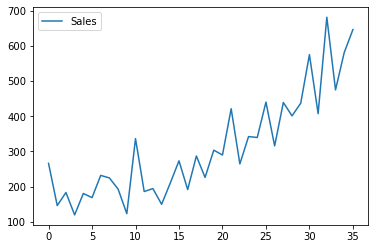

In [9]:
shampoo.plot()

In [11]:
shampoo2 = pd.read_csv('C://Users/kiimi/Downloads/shampoo.csv',index_col=[0],parse_dates=True,squeeze=True)

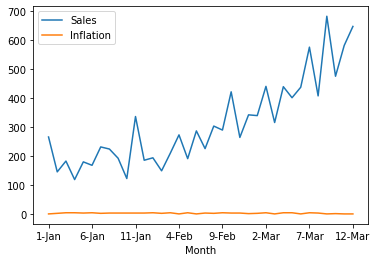

In [12]:
shampoo2.plot()

In [13]:
shampoo2.drop('Inflation',axis=1,inplace=True)

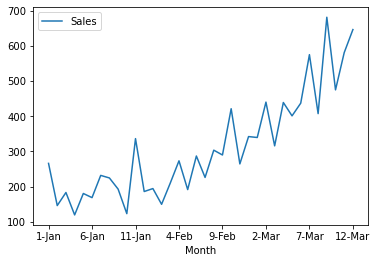

In [14]:
shampoo2.plot()

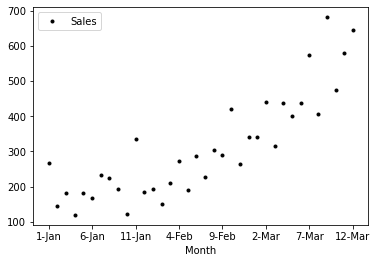

In [18]:
shampoo2.plot(style = 'k.')

In [16]:
shampoo2.size

36

In [17]:
shampoo2.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [19]:
shampoo2_moving_average = shampoo2.rolling(window=10).mean()

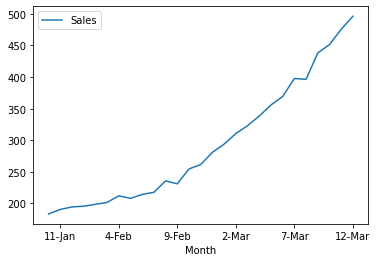

In [20]:
shampoo2_moving_average.plot()

In [22]:
shampoo_base = pd.concat([shampoo2,shampoo2.shift(1)],axis=1)

In [23]:
shampoo_base

,Sales,Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5


In [24]:
shampoo_base.columns = ['Actual_Sales','Forecast_Sales']

In [25]:
shampoo_base.head()

,Actual_Sales,Forecast_Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3


In [29]:
shampoo_base.dropna(inplace=True)

In [31]:
shampoo_base.head()

,Actual_Sales,Forecast_Sales
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3


In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [34]:
shampoo_error = mean_squared_error(shampoo_base.Actual_Sales,shampoo_base.Forecast_Sales)

In [35]:
shampoo_error

11715.388285714285

In [36]:
np.sqrt(shampoo_error)

108.23764726616282

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

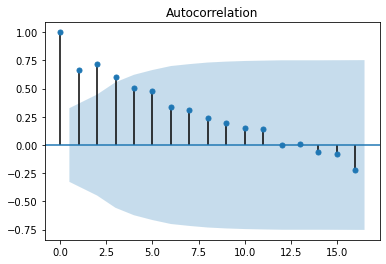

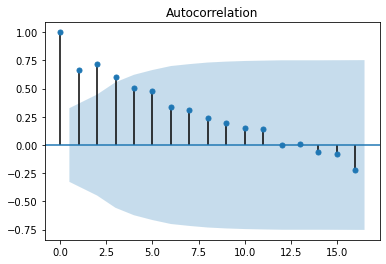

In [38]:
plot_acf(shampoo2)
# q = 3

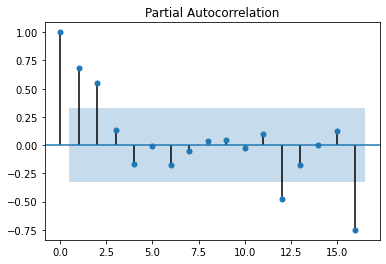

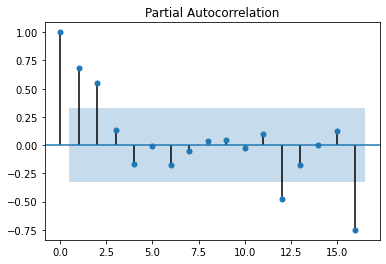

In [39]:
plot_pacf(shampoo2)
#p = 2

In [40]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
shampoo_train = shampoo2[0:25]
shampoo_test = shampoo2[25:37]

In [46]:
shampoo_model = ARIMA(shampoo_train,order=(4,1,3))

C:\Users\kiimi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\kiimi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [47]:
shampoo_model_fit = shampoo_model.fit()

In [48]:
shampoo_model_fit.aic

275.48351686204796

In [49]:
shampoo_forecast = shampoo_model_fit.forecast(steps=11)[0]

In [51]:
np.sqrt(mean_squared_error(shampoo_test,shampoo_forecast))
# Since the root mean squared error here is higher than the root mean squared error for the baseline, this shows that the baseline outperformed the ARIMA model in this scenario.

144.4606446428439